In [1]:
###### FINAL #######
#This script pulls in Diabetes Patient datasets from UCI ML Repository, builds and tests several predictive models and subsequently makes predictions for risks/likelihood of unplanned admission for patients with poorly managed diabetes conditions. This is likely due to various different reasons including non-compliance with medication, loss to follow-up on outpatient or GP appointments etc. The objective is to identify and predict such patient cohorts at an earlier stage, to permit clinicians to intervene and optimise the health of such identified patient cohorts. This will also reduce the likelihood of an avoidable hospital presentation/admission for these patients. 
# Author = "Dr Adaeze Nwobodo" email "AdaezeNwobodo@gmail.com"

<img src="RegressionModeling.png" style="width:1000px; height:300px"/>

In [2]:
# DEFINE HELPER FUNCTIONS

In [3]:
# 1
load_file <- function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", stringsAsFactors = FALSE, col.names = c("Date", "Time", "Code", "Value")))
}

print(load_file)

function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", stringsAsFactors = FALSE, col.names = c("Date", "Time", "Code", "Value")))
}


In [4]:
# 2
calculate_test_train_split <- function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
    round(N * 0.75) %>%
    gp <- runif(N)) %>%
    train_df <- data_frame[gp < 0.75, ]
    test_df <- data_frame[gp >= 0.75, ]
}

print(calculate_test_train_split)

function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
    round(N * 0.75) %>%
    gp <- runif(N)) %>%
    train_df <- data_frame[gp < 0.75, ]
    test_df <- data_frame[gp >= 0.75, ]
}


In [5]:
#IMPORT LIBRARIES

In [6]:
#Import Libraries
library(dplyr)
library(ggplot2)
library(tidyr)
install.packages("caret"); library(caret)
library(lubridate)
library(purrr)
library(mgcv)
library(rpart)
install.packages("sigr"); library(sigr)
library(tidyverse)
library(tidyselect)
library(tidymodels)
library(utils)
library(base)
library(broom)
library(cluster)
library(ellipsis)
library(graphics)
library(grDevices)
library(highr)
library(lattice)
library(methods)
library(nlme)
library(readr)
library(readxl)
library(stats)
library(stringr)
install.packages("ranger"); library(ranger)
library(tibble)
install.packages("xgboost"); library(xgboost)
library(randomForest)
library(magrittr)
install.packages("Metrics"); library(Metrics)
install.packages("assertive"); library(assertive)
library(lubridate)
install.packages("xts"); library(xts)
install.packages("hms"); library(hms)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'purrr'

The following object is masked from 'package:caret':

    lift

Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.3     v stringr 1.4.0
v readr   1.3.1     v

In [7]:
install.packages("vtreat"); library(vtreat)
install.packages("chron"); library(chron)
install.packages("data.table"); library(data.table)
install.packages("binr"); library(binr)
install.packages("psych"); library(psych)
install.packages("ggfortify"); library(ggfortify)
install.packages("tibble"); library(tibble)
library(mlbench)
install.packages("tidymodels"); library(tidymodels)
library(rpart) 
library(parsnip)
install.packages("wrapr"); library(wrapr)
library(brotools)
install.packages("rsample"); library(rsample)
install.packages("e1071"); library(e1071)
install.packages("elasticnet"); library(elasticnet)
install.packages("glmnet"); library(glmnet)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: wrapr

Attaching package: 'wrapr'

The following object is masked from 'package:tibble':

    view

The following objects are masked from 'package:tidyr':

    pack, unpack

The following object is masked from 'package:dplyr':

    coalesce


Attaching package: 'vtreat'

The following object is masked from 'package:recipes':

    prepare

The following object is masked from 'package:parsnip':

    fit

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'chron'

The following objects are masked from 'package:lubridate':

    days, hours, minutes, seconds, years

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'data.table'

The following object is masked from 'package:wrapr':

    :=

The following objects are masked from 'package:xts':

    first, last

The following object is masked from 

ERROR: Error in library(brotools): there is no package called 'brotools'


In [8]:
#LOADING FILES 

In [9]:
D1 <- load_file("data-01")
D1$pid <- c("D1")
head(D1, n = 10)

Date,Time,Code,Value,pid
04-21-1991,9:09,58,100,D1
04-21-1991,9:09,33,9,D1
04-21-1991,9:09,34,13,D1
04-21-1991,17:08,62,119,D1
04-21-1991,17:08,33,7,D1
04-21-1991,22:51,48,123,D1
04-22-1991,7:35,58,216,D1
04-22-1991,7:35,33,10,D1
04-22-1991,7:35,34,13,D1
04-22-1991,13:40,33,2,D1


In [10]:
D2 <- load_file("data-02")
D2$pid <- c("D2")
head(D2)

Date,Time,Code,Value,pid
10-10-1989,08:00,58,149,D2
10-10-1989,08:00,33,010,D2
10-10-1989,12:00,60,116,D2
10-10-1989,12:00,33,004,D2
10-10-1989,18:00,62,304,D2
10-10-1989,18:00,33,010,D2


In [11]:
D3 <- load_file("data-03")
D3$pid <- c("D3")

In [12]:
D4 <- load_file("data-04")
D4$pid <- c("D4")

In [13]:
D5 <- load_file("data-05")
D5$pid <- c("D5")

In [14]:
D6 <- load_file("data-06")
D6$pid <- c("D6")

In [15]:
D7 <- load_file("data-07")
D7$pid <- c("D7")

In [17]:
D8 <- load_file("data-08")
D8$pid <- c("D8")

In [18]:
D9 <- load_file("data-09")
D9$pid <- c("D9")

In [19]:
D10 <- load_file("data-10")
D10$pid <- c("D10")

In [20]:
D11 <- load_file("data-11")
D11$pid <- c("D11")

In [21]:
D12 <- load_file("data-12")
D12$pid <- c("D12")

In [22]:
D13 <- load_file("data-13")
D13$pid <- c("D13")

In [23]:
D14 <- load_file("data-14")
D14$pid <- c("D14")

In [24]:
D15 <- load_file("data-15")
D15$pid <- c("D15")

In [25]:
D16 <- load_file("data-16")
D16$pid <- c("D16")

In [26]:
D17 <- load_file("data-17")
D17$pid <- c("D17")

In [27]:
D18 <- load_file("data-18")
D18$pid <- c("D18")

In [28]:
D19 <- load_file("data-19")
D19$pid <- c("D19")

In [29]:
D20 <- load_file("data-20")
D20$pid <- c("D20")

In [30]:
D21 <- load_file("data-21")
D21$pid <- c("D21")

In [31]:
D22 <- load_file("data-22")
D22$pid <- c("D22")

In [32]:
D23 <- load_file("data-23")
D23$pid <- c("D23")

In [33]:
D24 <- load_file("data-24")
D24$pid <- c("D24")

In [34]:
D25 <- load_file("data-25")
D25$pid <- c("D25")

In [35]:
D26 <- load_file("data-26")
D26$pid <- c("D26")

In [37]:
D28 <- load_file("data-28")
D28$pid <- c("D28")

In [39]:
D30 <- load_file("data-30")
D30$pid <- c("D30")

In [40]:
D31 <- load_file("data-31")
D31$pid <- c("D31")

In [41]:
D32 <- load_file("data-32")
D32$pid <- c("D32")

In [43]:
Diabetes_data <- rbind(D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, D13, D14, D15, D16, D17, D18, D19, D20, D21, D22, D23, D24, D25, D26, D28, D30, D31, D32)

In [44]:
head(Diabetes_data)
str(Diabetes_data)

Date,Time,Code,Value,pid
04-21-1991,9:09,58,100,D1
04-21-1991,9:09,33,9,D1
04-21-1991,9:09,34,13,D1
04-21-1991,17:08,62,119,D1
04-21-1991,17:08,33,7,D1
04-21-1991,22:51,48,123,D1


'data.frame':	12112 obs. of  5 variables:
 $ Date : chr  "04-21-1991" "04-21-1991" "04-21-1991" "04-21-1991" ...
 $ Time : chr  "9:09" "9:09" "9:09" "17:08" ...
 $ Code : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value: chr  "100" "9" "13" "119" ...
 $ pid  : chr  "D1" "D1" "D1" "D1" ...


In [58]:
#Convert "Value" column from character to numeric
Diabetes_data$Value <- as.numeric(Diabetes_data$Value)

sapply(Diabetes_data, class)
str(Diabetes_data)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

Date        Time        Code       Value         pid 
"character" "character"   "integer"   "numeric" "character"

'data.frame':	12112 obs. of  5 variables:
 $ Date : chr  "04-21-1991" "04-21-1991" "04-21-1991" "04-21-1991" ...
 $ Time : chr  "9:09" "9:09" "9:09" "17:08" ...
 $ Code : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value: num  100 9 13 119 7 123 216 10 13 2 ...
 $ pid  : chr  "D1" "D1" "D1" "D1" ...


In [59]:
#Converting "Date" column from character to "date" format

#Parse date - "mdy" format of datasets to convert to ISO8601 standard "ymd" format
Diabetes_data2 <- Diabetes_data %>%
    mutate(date1 = mdy(Date))

head(Diabetes_data2)
str(Diabetes_data2)

Warning message:
" 7 failed to parse."

Date,Time,Code,Value,pid,date1
04-21-1991,9:09,58,100,D1,1991-04-21
04-21-1991,9:09,33,9,D1,1991-04-21
04-21-1991,9:09,34,13,D1,1991-04-21
04-21-1991,17:08,62,119,D1,1991-04-21
04-21-1991,17:08,33,7,D1,1991-04-21
04-21-1991,22:51,48,123,D1,1991-04-21


'data.frame':	12112 obs. of  6 variables:
 $ Date : chr  "04-21-1991" "04-21-1991" "04-21-1991" "04-21-1991" ...
 $ Time : chr  "9:09" "9:09" "9:09" "17:08" ...
 $ Code : int  58 33 34 62 33 48 58 33 34 33 ...
 $ Value: num  100 9 13 119 7 123 216 10 13 2 ...
 $ pid  : chr  "D1" "D1" "D1" "D1" ...
 $ date1: Date, format: "1991-04-21" "1991-04-21" ...


In [60]:
#Conversion of "Time" column from character to datetime format
Diabetes_data2$datetime = paste(Diabetes_data2$Date, Diabetes_data2$Time)
Diabetes_data2$datetime = mdy_hm(Diabetes_data2$datetime)
head(Diabetes_data2)
glimpse(Diabetes_data2)

Warning message:
" 7 failed to parse."

Date,Time,Code,Value,pid,date1,datetime
04-21-1991,9:09,58,100,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,9:09,33,9,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,9:09,34,13,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,17:08,62,119,D1,1991-04-21,1991-04-21 17:08:00
04-21-1991,17:08,33,7,D1,1991-04-21,1991-04-21 17:08:00
04-21-1991,22:51,48,123,D1,1991-04-21,1991-04-21 22:51:00


Rows: 12,112
Columns: 7
$ Date     <chr> "04-21-1991", "04-21-1991", "04-21-1991", "04-21-1991", "04-2~
$ Time     <chr> "9:09", "9:09", "9:09", "17:08", "17:08", "22:51", "7:35", "7~
$ Code     <int> 58, 33, 34, 62, 33, 48, 58, 33, 34, 33, 62, 33, 58, 33, 34, 6~
$ Value    <dbl> 100, 9, 13, 119, 7, 123, 216, 10, 13, 2, 211, 7, 257, 11, 13,~
$ pid      <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "~
$ date1    <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-21, ~
$ datetime <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 09:09:0~


In [61]:
#Remove redundant character columns ("Date", "Time")
Diabetes_data3 <- Diabetes_data2 %>%
    select(-Date, -Time)

tail(Diabetes_data3)

,Code,Value,pid,date1,datetime
12107,71,0,D32,1990-08-07,1990-08-07 22:25:00
12108,33,2,D32,1990-08-07,1990-08-07 22:28:00
12109,34,7,D32,1990-08-07,1990-08-07 22:28:00
12110,58,213,D32,1990-08-08,1990-08-08 07:30:00
12111,71,0,D32,1990-08-08,1990-08-08 07:33:00
12112,60,101,D32,1990-08-08,1990-08-08 12:30:00


In [62]:
#Filter out datasets for Insulin types

target <- c(33, 34, 35)

Insulin_data <- Diabetes_data3 %>%
    filter(Code %in% target) %>%
    rename(Insulin_Code = Code, Insulin_dose = Value)

head(Insulin_data)

Insulin_Code,Insulin_dose,pid,date1,datetime
33,9,D1,1991-04-21,1991-04-21 09:09:00
34,13,D1,1991-04-21,1991-04-21 09:09:00
33,7,D1,1991-04-21,1991-04-21 17:08:00
33,10,D1,1991-04-22,1991-04-22 07:35:00
34,13,D1,1991-04-22,1991-04-22 07:35:00
33,2,D1,1991-04-22,1991-04-22 13:40:00


In [63]:
#Repeat same for Glucose

#Filter out datasets for Blood Glucose Values against Glucose Codes

target2 <- c(48, 58, 60, 62, 65)

Glucose_data <- Diabetes_data3 %>%
    filter(Code %in% target2) %>%
    rename(Glucose_Code = Code, Glucose_Value = Value)

head(Glucose_data)

Glucose_Code,Glucose_Value,pid,date1,datetime
58,100,D1,1991-04-21,1991-04-21 09:09:00
62,119,D1,1991-04-21,1991-04-21 17:08:00
48,123,D1,1991-04-21,1991-04-21 22:51:00
58,216,D1,1991-04-22,1991-04-22 07:35:00
62,211,D1,1991-04-22,1991-04-22 16:56:00
58,257,D1,1991-04-23,1991-04-23 07:25:00


In [64]:
#Combine both tables for Insulin and Glucose
Diabetes_InsGlucose <- Insulin_data %>%
    inner_join(Glucose_data, by = c("pid", "date1", "datetime"))

head(Diabetes_InsGlucose)
tail(Diabetes_InsGlucose)
nrow(Diabetes_InsGlucose)

Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211


,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value
3629,33,3,D31,1991-08-13,1991-08-13 12:00:00,60,203
3630,33,6,D31,1991-08-13,1991-08-13 18:00:00,62,185
3631,33,5,D31,1991-08-14,1991-08-14 08:00:00,58,161
3632,34,27,D31,1991-08-14,1991-08-14 08:00:00,58,161
3633,33,3,D31,1991-08-14,1991-08-14 12:00:00,60,256
3634,33,6,D31,1991-08-14,1991-08-14 18:00:00,62,209


[1] 3634

In [71]:
#Filter out NA's from datetime column

#Use which() and is.na() to create index of observations without a datetime
na_index <- which(is.na(Diabetes_InsGlucose$datetime))
na_index

#Compute median datetime value
median_datetime <- median(Diabetes_InsGlucose$datetime, na.rm = TRUE)
median_datetime

#Make a copy of the dataframe
Diabetes_InsGlucose_replace <- Diabetes_InsGlucose

#Replace missing datetime values
Diabetes_InsGlucose_replace$datetime[na_index] <- median_datetime

#Check if NA's have been removed
summary(Diabetes_InsGlucose_replace)

#Rename the replaced Diabetes Data
Diabetes_InsGlucose2 <- Diabetes_InsGlucose_replace

[1] 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466

[1] "1991-01-16 16:30:00 UTC"

  Insulin_Code    Insulin_dose       pid                date1           
 Min.   :33.00   Min.   : 1.00   Length:3634        Min.   :1988-07-13  
 1st Qu.:33.00   1st Qu.: 5.00   Class :character   1st Qu.:1989-11-11  
 Median :33.00   Median : 7.00   Mode  :character   Median :1991-01-16  
 Mean   :33.27   Mean   :10.15                      Mean   :1990-08-13  
 3rd Qu.:34.00   3rd Qu.:14.00                      3rd Qu.:1991-06-13  
 Max.   :34.00   Max.   :35.00                      Max.   :1991-09-23  
                                                    NA's   :12          
    datetime                    Glucose_Code   Glucose_Value  
 Min.   :1988-07-13 08:00:00   Min.   :48.00   Min.   :  0.0  
 1st Qu.:1989-11-11 11:37:30   1st Qu.:58.00   1st Qu.:109.0  
 Median :1991-01-16 16:30:00   Median :58.00   Median :154.0  
 Mean   :1990-08-14 16:05:52   Mean   :59.24   Mean   :160.7  
 3rd Qu.:1991-06-13 11:11:15   3rd Qu.:62.00   3rd Qu.:205.0  
 Max.   :1991-09-23 21:10:00   Max.   

In [72]:
#Repeat above process to remove NA's from Glucose Value column

#Filter out NA's from Glucose_Value column

#Use which() and is.na() to create index of observations without a glucose value
na_index2 <- which(is.na(Diabetes_InsGlucose2$Glucose_Value))
na_index2

#Compute median glucose value
median_gluc <- median(Diabetes_InsGlucose2$Glucose_Value, na.rm = TRUE)
median_gluc

#Make a copy of the dataframe
Diabetes_InsGlucose_replace2 <- Diabetes_InsGlucose2

#Replace missing glucose values
Diabetes_InsGlucose_replace2$Glucose_Value[na_index2] <- median_gluc

#Check if NA's have been removed
summary(Diabetes_InsGlucose_replace2)

#Rename the replaced Diabetes Data
Diabetes_InsGlucose3 <- Diabetes_InsGlucose_replace2

[1] 516 533 536 540 542 549 737

[1] 154

  Insulin_Code    Insulin_dose       pid                date1           
 Min.   :33.00   Min.   : 1.00   Length:3634        Min.   :1988-07-13  
 1st Qu.:33.00   1st Qu.: 5.00   Class :character   1st Qu.:1989-11-11  
 Median :33.00   Median : 7.00   Mode  :character   Median :1991-01-16  
 Mean   :33.27   Mean   :10.15                      Mean   :1990-08-13  
 3rd Qu.:34.00   3rd Qu.:14.00                      3rd Qu.:1991-06-13  
 Max.   :34.00   Max.   :35.00                      Max.   :1991-09-23  
                                                    NA's   :12          
    datetime                    Glucose_Code   Glucose_Value  
 Min.   :1988-07-13 08:00:00   Min.   :48.00   Min.   :  0.0  
 1st Qu.:1989-11-11 11:37:30   1st Qu.:58.00   1st Qu.:109.0  
 Median :1991-01-16 16:30:00   Median :58.00   Median :154.0  
 Mean   :1990-08-14 16:05:52   Mean   :59.24   Mean   :160.7  
 3rd Qu.:1991-06-13 11:11:15   3rd Qu.:62.00   3rd Qu.:205.0  
 Max.   :1991-09-23 21:10:00   Max.   

In [65]:
#FEATURE ENGINEERING

In [73]:
#Create feature to "bucket" datetimes in patient dataset 1 into specific months
Diabetes_InsGlucose_dateGroups <- Diabetes_InsGlucose3 %>%
    mutate(time_period = case_when(datetime >= '1991-04-21' & datetime <= '1991-05-19' ~ "month_1",
                                  datetime >= '1991-05-20' & datetime <= '1991-06-16' ~ "month_2",
                                  datetime >= '1991-06-17' & datetime <= '1991-07-14' ~ "month_3",
                                  datetime >= '1991-07-15' & datetime <= '1991-08-11' ~ "month_4",
                                  datetime >= '1991-08-12' & datetime <= '1991-09-01' ~ "month_5"))
head(Diabetes_InsGlucose_dateGroups)

Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211,month_1


In [104]:
#One hot encode the "buckets" of month, Insulin Code and Glucose Code categories to numeric
Diabetes_InsGlucose_buckets <- Diabetes_InsGlucose_dateGroups %>%
    mutate(
            month_1 = ifelse(time_period == "month_1", 1, 0),
            month_2 = ifelse(time_period == "month_2", 1, 0),
            month_3 = ifelse(time_period == "month_3", 1, 0),
            month_4 = ifelse(time_period == "month_4", 1, 0), 
            month_5 = ifelse(time_period == "month_5", 1, 0),
            Reg_Insulin = ifelse(Insulin_Code == '33', 1, 0),
            Inter_Insulin = ifelse(Insulin_Code == '34', 1, 0),
            LongAct_Insulin = ifelse(Insulin_Code == '35', 1, 0),
            Unspec_Gluc = ifelse(Glucose_Code == '48', 1,0),
            PreBreak_Gluc = ifelse(Glucose_Code == '58', 1, 0),
            PreLun_Gluc = ifelse(Glucose_Code == '60', 1, 0),
            PreSup_Gluc = ifelse(Glucose_Code == '62', 1, 0),
            Hypoglycaemia = ifelse(Glucose_Code == '65', 1, 0))

head(Diabetes_InsGlucose_buckets)
glimpse(Diabetes_InsGlucose_buckets)

Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,...,month_4,month_5,Reg_Insulin,Inter_Insulin,LongAct_Insulin,Unspec_Gluc,PreBreak_Gluc,PreLun_Gluc,PreSup_Gluc,Hypoglycaemia
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,1,0,0,0,1,0,0,0
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,1,0,0,1,0,0,0
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1,1,0,...,0,0,1,0,0,0,0,0,1,0
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,0,0,1,0,0,0,1,0,0,0
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,0,0,0,1,0,0,1,0,0,0
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211,month_1,1,0,...,0,0,1,0,0,0,0,0,1,0


Rows: 3,634
Columns: 21
$ Insulin_Code    <int> 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34~
$ Insulin_dose    <dbl> 9, 13, 7, 10, 13, 7, 11, 13, 7, 10, 14, 5, 9, 14, 7, 2~
$ pid             <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", ~
$ date1           <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-22, 1991-~
$ datetime        <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 ~
$ Glucose_Code    <int> 58, 58, 62, 58, 58, 62, 58, 58, 62, 58, 58, 48, 58, 58~
$ Glucose_Value   <dbl> 100, 100, 119, 216, 216, 211, 257, 257, 129, 239, 239,~
$ time_period     <chr> "month_1", "month_1", "month_1", "month_1", "month_1",~
$ month_1         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ month_2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_3         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_4         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_5       

In [105]:
#Include column for time of day
Diabetes_InsGlucose_buckets2 <- Diabetes_InsGlucose_buckets %>%
    mutate(hod = hour(datetime))

glimpse(Diabetes_InsGlucose_buckets2)

Rows: 3,634
Columns: 22
$ Insulin_Code    <int> 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34~
$ Insulin_dose    <dbl> 9, 13, 7, 10, 13, 7, 11, 13, 7, 10, 14, 5, 9, 14, 7, 2~
$ pid             <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", ~
$ date1           <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-22, 1991-~
$ datetime        <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 ~
$ Glucose_Code    <int> 58, 58, 62, 58, 58, 62, 58, 58, 62, 58, 58, 48, 58, 58~
$ Glucose_Value   <dbl> 100, 100, 119, 216, 216, 211, 257, 257, 129, 239, 239,~
$ time_period     <chr> "month_1", "month_1", "month_1", "month_1", "month_1",~
$ month_1         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ month_2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_3         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_4         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_5       

In [106]:
#"Bucket" hour of day column into specific periods of day

Diabetes_InsGlucose_buckets3 <- Diabetes_InsGlucose_buckets2 %>%
    mutate(time_day = case_when(hod >= 6 & hod < 12 ~ "morning",
                                hod >= 12 & hod < 18 ~ "afternoon",
                                hod >= 0 & hod < 6 ~ "nighttime"))
glimpse(Diabetes_InsGlucose_buckets3)

Rows: 3,634
Columns: 23
$ Insulin_Code    <int> 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34~
$ Insulin_dose    <dbl> 9, 13, 7, 10, 13, 7, 11, 13, 7, 10, 14, 5, 9, 14, 7, 2~
$ pid             <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", ~
$ date1           <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-22, 1991-~
$ datetime        <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 ~
$ Glucose_Code    <int> 58, 58, 62, 58, 58, 62, 58, 58, 62, 58, 58, 48, 58, 58~
$ Glucose_Value   <dbl> 100, 100, 119, 216, 216, 211, 257, 257, 129, 239, 239,~
$ time_period     <chr> "month_1", "month_1", "month_1", "month_1", "month_1",~
$ month_1         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ month_2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_3         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_4         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_5       

In [107]:
#One hot encode "time of day" column
Diabetes_InsGlucose_buckets4 <- Diabetes_InsGlucose_buckets3 %>%
    mutate(
            morn = ifelse(time_day == "morning", 1, 0),
            aft_noon = ifelse(time_day == "afternoon", 1, 0),
            evening = ifelse(time_day == "evening", 1, 0),
            night = ifelse(time_day == "nighttime", 1, 0))

glimpse(Diabetes_InsGlucose_buckets4)
nrow(Diabetes_InsGlucose_buckets4)

Rows: 3,634
Columns: 27
$ Insulin_Code    <int> 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34~
$ Insulin_dose    <dbl> 9, 13, 7, 10, 13, 7, 11, 13, 7, 10, 14, 5, 9, 14, 7, 2~
$ pid             <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", ~
$ date1           <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-22, 1991-~
$ datetime        <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 ~
$ Glucose_Code    <int> 58, 58, 62, 58, 58, 62, 58, 58, 62, 58, 58, 48, 58, 58~
$ Glucose_Value   <dbl> 100, 100, 119, 216, 216, 211, 257, 257, 129, 239, 239,~
$ time_period     <chr> "month_1", "month_1", "month_1", "month_1", "month_1",~
$ month_1         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ month_2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_3         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_4         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_5       

[1] 3634

In [108]:
# MODELING SECTION

In [109]:
#Split datasets into Test/Train sets
N_patient <- nrow(Diabetes_InsGlucose_buckets4)
N_patient

[1] 3634

In [110]:
#Number of rows of training data required for models
target <- round(N_patient * 0.75)
target

[1] 2726

In [111]:
#Create a vector of N_sets uniform variables
gp_patient <- runif(N_patient)

#Create training set patient1 data (75% of the data) & patient1 test dataset (25% of data)
patient_train <- Diabetes_InsGlucose_buckets4[gp_patient < 0.75, ]
patient_test <- Diabetes_InsGlucose_buckets4[gp_patient >= 0.75, ]

#Examine the training and test datasets
nrow(patient_train)
nrow(patient_test)

[1] 2741

[1] 893

In [112]:
head(patient_train)
glimpse(patient_train)

,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,...,PreBreak_Gluc,PreLun_Gluc,PreSup_Gluc,Hypoglycaemia,hod,time_day,morn,aft_noon,evening,night
4,33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,1,0,0,0,7,morning,1,0,0,0
5,34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,1,0,0,0,7,morning,1,0,0,0
6,33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211,month_1,1,0,...,0,0,1,0,16,afternoon,0,1,0,0
7,33,11,D1,1991-04-23,1991-04-23 07:25:00,58,257,month_1,1,0,...,1,0,0,0,7,morning,1,0,0,0
8,34,13,D1,1991-04-23,1991-04-23 07:25:00,58,257,month_1,1,0,...,1,0,0,0,7,morning,1,0,0,0
9,33,7,D1,1991-04-23,1991-04-23 17:25:00,62,129,month_1,1,0,...,0,0,1,0,17,afternoon,0,1,0,0


Rows: 2,741
Columns: 27
$ Insulin_Code    <int> 33, 34, 33, 33, 34, 33, 33, 33, 34, 33, 33, 33, 33, 33~
$ Insulin_dose    <dbl> 10, 13, 7, 11, 13, 7, 10, 9, 14, 7, 2, 9, 7, 10, 8, 10~
$ pid             <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", ~
$ date1           <date> 1991-04-22, 1991-04-22, 1991-04-22, 1991-04-23, 1991-~
$ datetime        <dttm> 1991-04-22 07:35:00, 1991-04-22 07:35:00, 1991-04-22 ~
$ Glucose_Code    <int> 58, 58, 62, 58, 58, 62, 58, 58, 58, 62, 48, 58, 62, 58~
$ Glucose_Value   <dbl> 216, 216, 211, 257, 257, 129, 239, 67, 67, 206, 288, 7~
$ time_period     <chr> "month_1", "month_1", "month_1", "month_1", "month_1",~
$ month_1         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ month_2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_3         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_4         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_5       

In [114]:
#Baseline linear Model fit

base_mdl <- lm(Glucose_Value ~ Insulin_dose, data = patient_train)
base_mdl

#From model outputs below, for each additional unit of Insulin taken, glucose values rise by 0.73mM (which makes no sense)


Call:
lm(formula = Glucose_Value ~ Insulin_dose, data = patient_train)

Coefficients:
 (Intercept)  Insulin_dose  
    152.7049        0.7297  


In [115]:
#Extracting further summary statistics from baseline model
augment(base_mdl) %>%
    arrange(desc(.resid)) %>%
    head()

.rownames,Glucose_Value,Insulin_dose,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
1357,450,9,159.2721,290.7279,0.0003761022,73.65884,0.002916218,3.937226
1399,450,9,159.2721,290.7279,0.0003761022,73.65884,0.002916218,3.937226
1481,450,14,162.9205,287.0795,0.0004575586,73.66406,0.003459892,3.887975
1373,450,24,170.2173,279.7827,0.0016324304,73.67409,0.011751929,3.791381
1381,450,24,170.2173,279.7827,0.0016324304,73.67409,0.011751929,3.791381
1509,423,14,162.9205,260.0795,0.0004575586,73.70069,0.002839686,3.522309


In [116]:
#Predicting using baseline linear model
base_mdl_pred <- patient_test %>%
    mutate(Glucose_Value1 = predict(base_mdl, patient_test))

head(base_mdl_pred)

,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,...,PreLun_Gluc,PreSup_Gluc,Hypoglycaemia,hod,time_day,morn,aft_noon,evening,night,Glucose_Value1
1,33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,159.2721
2,34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,162.1908
3,33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1,1,0,...,0,1,0,17,afternoon,0,1,0,0,157.8127
11,34,14,D1,1991-04-24,1991-04-24 07:52:00,58,239,month_1,1,0,...,0,0,0,7,morning,1,0,0,0,162.9205
12,33,5,D1,1991-04-24,1991-04-24 22:09:00,48,340,month_1,1,0,...,0,0,0,22,NA,NA,NA,NA,NA,156.3533
18,34,14,D1,1991-04-26,1991-04-26 05:52:00,58,77,month_1,1,0,...,0,0,0,5,nighttime,0,0,0,1,162.9205


In [117]:
#Summary statistics from baseline linear model
glance(base_mdl)

#R-squared here = correlation between explanatory and response variables. The higher the value (i.e. closer to 1, the better the model 
#fit is to the data and the better the model's performance)
#adjusted r-squared for baseline linear model here approximately 0, therefore model performance no better than random chance

#RSE(sigma) - residual aka difference between prediction and observed response. The closer to 0, the better the fit is to the data. RSE 
#of 73 suggests the difference between the recorded glucose values and those predicted by the model = 73

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
0.00525489,0.004891712,73.85469,14.46918,0.0001455854,1,-15680.36,31366.73,31384.48,14939917,2739,2741


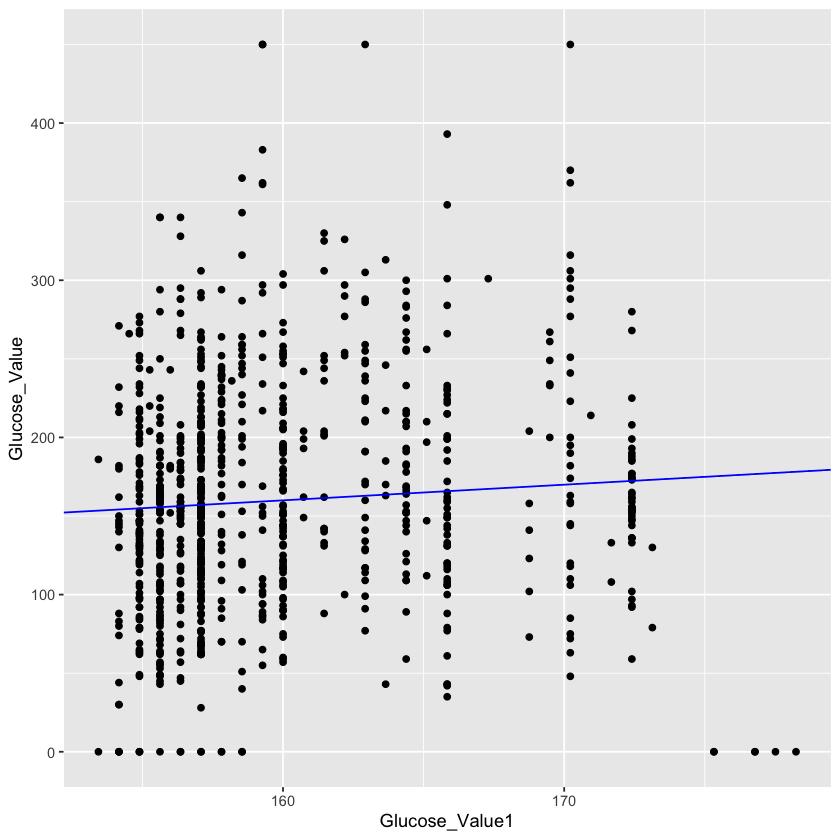

In [118]:
#Plot to compare predictions to actual outputs 
ggplot(base_mdl_pred, aes(x = Glucose_Value1, y = Glucose_Value)) + geom_point() + geom_abline(colour = "blue")

`geom_smooth()` using formula 'y ~ x'


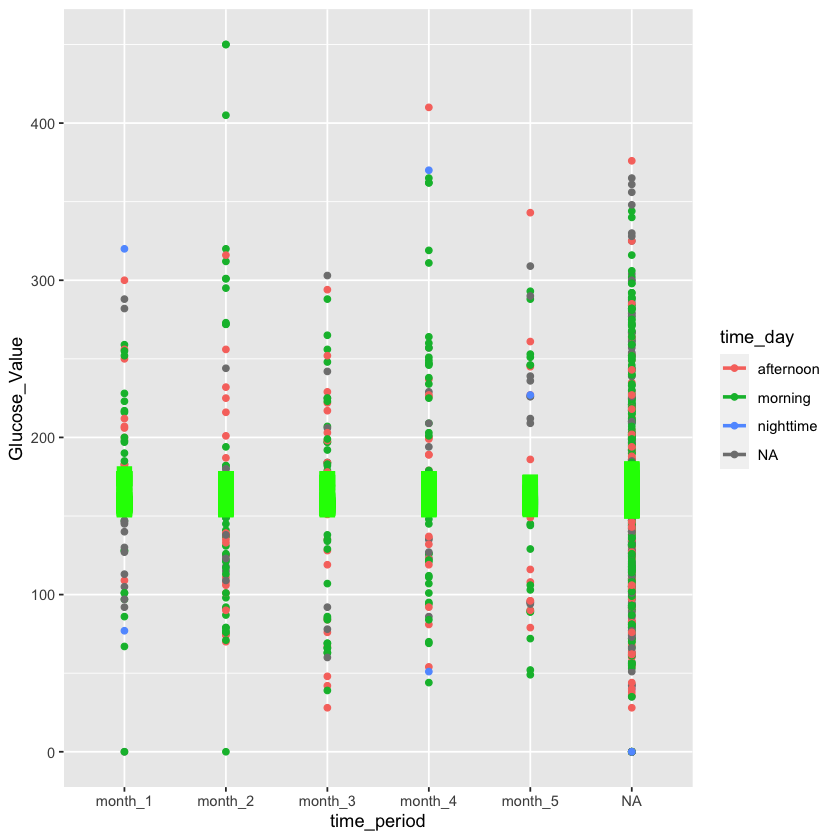

In [100]:
#Visualising again baseline model outputs with predictions superimposed
ggplot(patient_test, aes(time_period, Glucose_Value, colour = time_day)) + geom_point() + geom_smooth(method = "lm", se = FALSE) + 

#add predictions points
geom_point(data = base_mdl_pred, size = 4, shape = 15, colour = "green")

In [120]:
#Fit & predict baseline model using all feature inputs

base_mdl2 <- lm(Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + PreBreak_Gluc + 
                PreLun_Gluc + PreSup_Gluc, data = patient_train)
base_mdl2


Call:
lm(formula = Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + 
    month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + 
    PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc, data = patient_train)

Coefficients:
  (Intercept)   Insulin_dose    Reg_Insulin  Inter_Insulin        month_1  
      -85.017          3.817         62.152             NA          4.443  
      month_2        month_3        month_4        month_5    Unspec_Gluc  
       -2.048         -4.304          2.164             NA        249.894  
PreBreak_Gluc    PreLun_Gluc    PreSup_Gluc  
      171.009        154.865        155.686  


In [121]:
glance(base_mdl2)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
0.1468274,0.1378371,71.29442,16.33189,1.993357e-27,10,-5452.795,10929.59,10987.99,4823667,949,960


In [102]:
#SUBSEGMENT ENTIRE TRAINING DATASET INTO TIMES OF DAY AND RUN LINEAR MODEL SEPARATELY ON DIFFERENT PARTS OF TRAINING DATA. DO MODELS AGREE WITH 
#EACH OTHER?

In [124]:
#Linear model prediction of breakfast/am glucose levels (with single feature input)

#Fit linear model for morning glucose doses 
morn_data <- patient_train %>%
    filter(time_day == "morning")

mdl_morn <- lm(Glucose_Value ~ Insulin_dose, data = morn_data)
mdl_morn
glance(mdl_morn)


Call:
lm(formula = Glucose_Value ~ Insulin_dose, data = morn_data)

Coefficients:
 (Intercept)  Insulin_dose  
    171.9897       -0.4249  


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
0.002284963,0.001568728,72.75913,3.190243,0.07429643,1,-7958.999,15924,15939.72,7374391,1393,1395


In [125]:
#Linear model prediction of breakfast/am glucose levels (with three feature inputs)

mdl_morn2 <- lm(Glucose_Value ~ Insulin_dose + month_1 + Unspec_Gluc, data = morn_data)
mdl_morn2
glance(mdl_morn2)


Call:
lm(formula = Glucose_Value ~ Insulin_dose + month_1 + Unspec_Gluc, 
    data = morn_data)

Coefficients:
 (Intercept)  Insulin_dose       month_1   Unspec_Gluc  
   166.73874       0.09233     -13.01197            NA  


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
0.003741377,-3.95614e-06,80.30465,0.9989437,0.3689579,2,-3104.046,6216.091,6233.22,3430781,532,535


In [127]:
#Linear model prediction of breakfast/am glucose levels (with all feature inputs)

mdl_morn3 <- lm(Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc, data = morn_data)
mdl_morn3
glance(mdl_morn3)


Call:
lm(formula = Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + 
    month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + 
    PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc, data = morn_data)

Coefficients:
  (Intercept)   Insulin_dose    Reg_Insulin  Inter_Insulin        month_1  
      -49.748          1.810         31.125             NA          4.673  
      month_2        month_3        month_4        month_5    Unspec_Gluc  
       10.826         -4.741         -2.613             NA             NA  
PreBreak_Gluc    PreLun_Gluc    PreSup_Gluc  
      176.777        178.491        180.578  


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
0.1208891,0.1058186,75.93686,8.021585,3.604675e-11,9,-3070.582,6163.165,6210.27,3027364,525,535


In [133]:
#Predicting using linear model fit to all features inputs within training morning dataset
predictions_morning <- patient_test %>%
    mutate(Glucose_Value1 = predict(mdl_morn3, patient_test))

head(predictions_morning)

Warning message in predict.lm(mdl_morn3, patient_test):
"prediction from a rank-deficient fit may be misleading"

,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,...,PreLun_Gluc,PreSup_Gluc,Hypoglycaemia,hod,time_day,morn,aft_noon,evening,night,Glucose_Value1
1,33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,179.115489
2,34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,155.229237
3,33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1,1,0,...,0,1,0,17,afternoon,0,1,0,0,179.296670
11,34,14,D1,1991-04-24,1991-04-24 07:52:00,58,239,month_1,1,0,...,0,0,0,7,morning,1,0,0,0,157.038964
12,33,5,D1,1991-04-24,1991-04-24 22:09:00,48,340,month_1,1,0,...,0,0,0,22,NA,NA,NA,NA,NA,-4.900572
18,34,14,D1,1991-04-26,1991-04-26 05:52:00,58,77,month_1,1,0,...,0,0,0,5,nighttime,0,0,0,1,157.038964


Warning message:
"Removed 554 rows containing missing values (geom_point)."

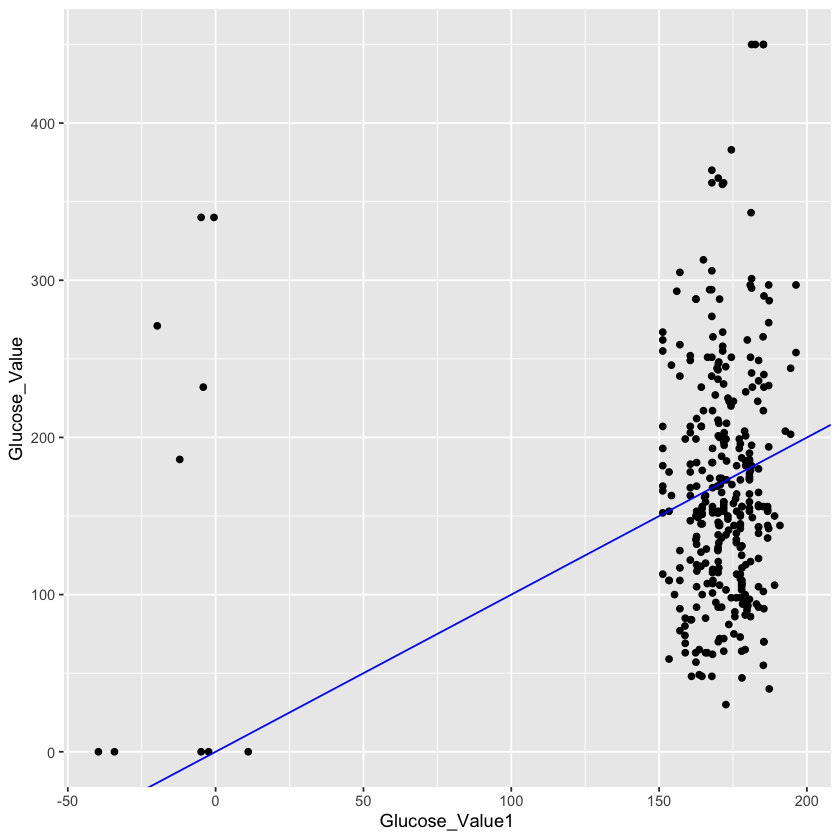

In [134]:
#Plot to compare predictions to actual outputs 
ggplot(predictions_morning, aes(x = Glucose_Value1, y = Glucose_Value)) + geom_point() + geom_abline(colour = "blue")

In [128]:
#Check for interactions

#Linear model prediction of breakfast/am glucose values (including an interaction between Regular Insulin and PreBreakfast glucose)
mdl_mornInteraction <- lm(Glucose_Value ~ Reg_Insulin + PreBreak_Gluc + Reg_Insulin:PreBreak_Gluc + Inter_Insulin + month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + PreLun_Gluc + PreSup_Gluc, data = morn_data)
mdl_mornInteraction
glance(mdl_mornInteraction)


Call:
lm(formula = Glucose_Value ~ Reg_Insulin + PreBreak_Gluc + Reg_Insulin:PreBreak_Gluc + 
    Inter_Insulin + month_1 + month_2 + month_3 + month_4 + month_5 + 
    Unspec_Gluc + PreLun_Gluc + PreSup_Gluc, data = morn_data)

Coefficients:
              (Intercept)                Reg_Insulin  
                 -6.08134                   -0.03183  
            PreBreak_Gluc              Inter_Insulin  
                170.38817                         NA  
                  month_1                    month_2  
                  6.30413                   13.36026  
                  month_3                    month_4  
                 -2.08872                   -0.34987  
                  month_5                Unspec_Gluc  
                       NA                         NA  
              PreLun_Gluc                PreSup_Gluc  
                174.48386                  184.47740  
Reg_Insulin:PreBreak_Gluc  
                  3.63781  


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
0.1128398,0.09763138,76.28371,7.419544,3.124199e-10,9,-3073.021,6168.041,6215.146,3055082,525,535


In [135]:
#REPEAT ABOVE PROCESS FOR AFTERNOON PREDICTIONS

In [141]:
#Linear model prediction of AFTERNOON glucose levels (with all feature inputs)

#Fit linear model for afternoon glucose doses 
aftnoon_data <- patient_train %>%
    filter(time_day == "afternoon")

mdl_aftnoon <- lm(Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc, data = aftnoon_data)
mdl_aftnoon
glance(mdl_aftnoon)


Call:
lm(formula = Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + 
    month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + 
    PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc, data = aftnoon_data)

Coefficients:
  (Intercept)   Insulin_dose    Reg_Insulin  Inter_Insulin        month_1  
      -93.076         19.577             NA             NA         28.765  
      month_2        month_3        month_4        month_5    Unspec_Gluc  
        7.523          9.759         25.360             NA             NA  
PreBreak_Gluc    PreLun_Gluc    PreSup_Gluc  
           NA        143.961         84.630  


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
0.3229112,0.3035658,59.03774,16.69189,5.747124e-18,7,-1386.706,2791.411,2823.212,853936.3,245,253


In [142]:
#Make predictions using model fit to afternoon data

predictions_afternoon <- patient_test %>%
    mutate(Glucose_Value1 = predict(mdl_aftnoon, patient_test))

head(predictions_afternoon)

Warning message in predict.lm(mdl_aftnoon, patient_test):
"prediction from a rank-deficient fit may be misleading"

,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,...,PreLun_Gluc,PreSup_Gluc,Hypoglycaemia,hod,time_day,morn,aft_noon,evening,night,Glucose_Value1
1,33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,111.87889
2,34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,190.18534
3,33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1,1,0,...,0,1,0,17,afternoon,0,1,0,0,157.35587
11,34,14,D1,1991-04-24,1991-04-24 07:52:00,58,239,month_1,1,0,...,0,0,0,7,morning,1,0,0,0,209.76195
12,33,5,D1,1991-04-24,1991-04-24 22:09:00,48,340,month_1,1,0,...,0,0,0,22,NA,NA,NA,NA,NA,33.57245
18,34,14,D1,1991-04-26,1991-04-26 05:52:00,58,77,month_1,1,0,...,0,0,0,5,nighttime,0,0,0,1,209.76195


In [138]:
#REPEATING FOR EVENING DATA

In [143]:
#Linear model prediction of EVENING glucose levels (with all feature inputs)

#Fit linear model for evening glucose doses 
evening_data <- patient_train %>%
    filter(time_day == "evening")

mdl_evening <- lm(Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc, data = evening_data)
mdl_evening
glance(mdl_evening)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


In [145]:
#REPEATING FOR NIGHTTIME DATA

In [146]:
#Linear model prediction of NIGHTTIME glucose levels (with all feature inputs)

#Fit linear model for nighttime glucose doses 
nighttime_data <- patient_train %>%
    filter(time_day == "nighttime")

mdl_night <- lm(Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc, data = nighttime_data)
mdl_night
glance(mdl_night)


Call:
lm(formula = Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + 
    month_1 + month_2 + month_3 + month_4 + month_5 + Unspec_Gluc + 
    PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc, data = nighttime_data)

Coefficients:
  (Intercept)   Insulin_dose    Reg_Insulin  Inter_Insulin        month_1  
       21.219          2.067         46.378             NA         69.669  
      month_2        month_3        month_4        month_5    Unspec_Gluc  
       41.898         44.449         20.991             NA             NA  
PreBreak_Gluc    PreLun_Gluc    PreSup_Gluc  
       75.169             NA             NA  


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
0.1558045,-0.1918054,96.25027,0.4482166,0.8579093,7,-144.8265,307.653,318.6228,157489.9,17,25


In [147]:
#Make predictions using model fit to nighttime data

predictions_nighttime <- patient_test %>%
    mutate(Glucose_Value1 = predict(mdl_night, patient_test))

head(predictions_nighttime)

Warning message in predict.lm(mdl_night, patient_test):
"prediction from a rank-deficient fit may be misleading"

,Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,...,PreLun_Gluc,PreSup_Gluc,Hypoglycaemia,hod,time_day,morn,aft_noon,evening,night,Glucose_Value1
1,33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,231.0395
2,34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,192.9302
3,33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1,1,0,...,0,1,0,17,afternoon,0,1,0,0,151.7360
11,34,14,D1,1991-04-24,1991-04-24 07:52:00,58,239,month_1,1,0,...,0,0,0,7,morning,1,0,0,0,194.9973
12,33,5,D1,1991-04-24,1991-04-24 22:09:00,48,340,month_1,1,0,...,0,0,0,22,NA,NA,NA,NA,NA,147.6017
18,34,14,D1,1991-04-26,1991-04-26 05:52:00,58,77,month_1,1,0,...,0,0,0,5,nighttime,0,0,0,1,194.9973


`geom_smooth()` using formula 'y ~ x'


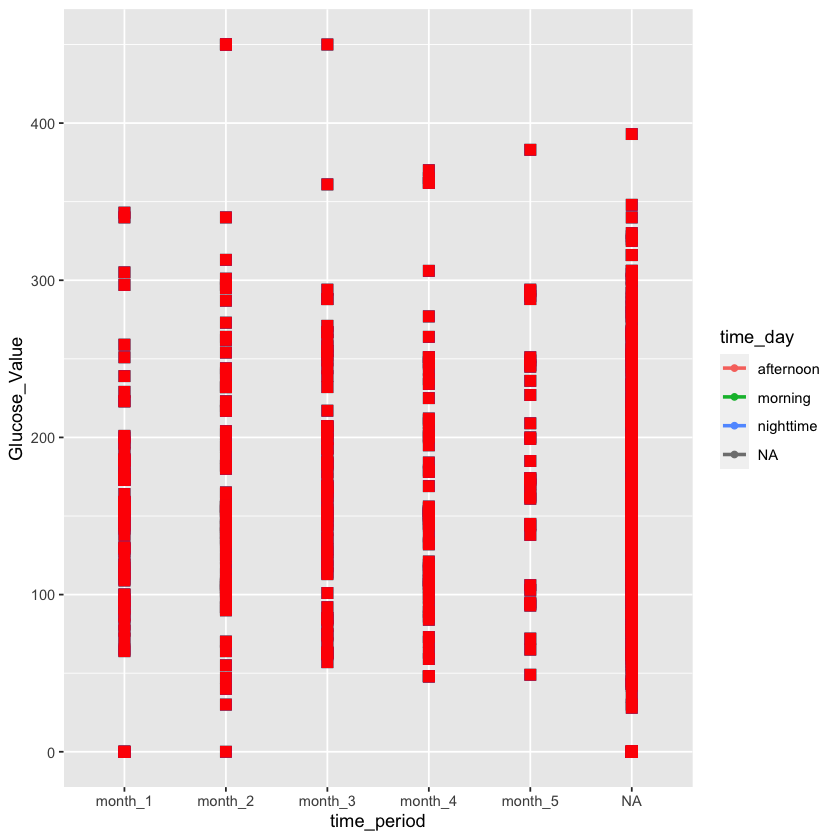

In [154]:
#VISUALISING MULTIPLE MODELS - ••••• HAS NOT INCLUDED PREDICTIONS FOR MORNING OR NIGHTTIME

ggplot(patient_test, aes(time_period, Glucose_Value, color = time_day)) + geom_point() + geom_smooth(method = "lm", se = FALSE) + 

#Adding points for the morning prediction coloured green, size = 3, shape = 15
geom_point(data = predictions_morning, size = 3, color = "green", shape = 15) +

#Adding points for the afternoon predictions coloured blue, size = 3, shape = 15
geom_point(data = predictions_afternoon, size = 3, color = "blue", shape = 15) +

#Adding points for the nighttime predictions coloured red, size = 3, shape = 15
geom_point(data = predictions_nighttime, size = 3, color = "red", shape = 15)


In [155]:
#CROSS VALIDATION PLAN

In [180]:
#Fit lm using 5-fold CV: model - REMOVED ALL DATASETS FOR "MONTHS" AND "TIMES OF DAY"

cv_model <- train(
        Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + Unspec_Gluc + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc,
        Diabetes_InsGlucose_buckets4,
        method = "lm",
        trControl = trainControl(
            method = "cv",
            number = 5,
            verboseIter = TRUE)
)

#Print model
cv_model

+ Fold1: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 


Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

3634 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2906, 2907, 2908, 2907, 2908 
Resampling results:

  RMSE      Rsquared   MAE     
  66.57386  0.1844499  52.32171

Tuning parameter 'intercept' was held constant at a value of TRUE

In [181]:
#RANDOM FOREST MODELING 

In [182]:
#Fit a Random Forest Model using Cross Validation

rf_model <- train(
    Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + Unspec_Gluc + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc,
        Diabetes_InsGlucose_buckets4,
        method = "rf",
        trControl = trainControl(
            method = "cv",
            number = 5,
            verboseIter = TRUE)
)

#Print model
rf_model

#RMSE values slightly lower (& r-squared values slightly higher) than outputs from the linear model. RF performs slightly better than the
#linear model but is still not performing well overall.

+ Fold1: mtry=2 
- Fold1: mtry=2 
+ Fold1: mtry=4 
- Fold1: mtry=4 
+ Fold1: mtry=7 
- Fold1: mtry=7 
+ Fold2: mtry=2 
- Fold2: mtry=2 
+ Fold2: mtry=4 
- Fold2: mtry=4 
+ Fold2: mtry=7 
- Fold2: mtry=7 
+ Fold3: mtry=2 
- Fold3: mtry=2 
+ Fold3: mtry=4 
- Fold3: mtry=4 
+ Fold3: mtry=7 
- Fold3: mtry=7 
+ Fold4: mtry=2 
- Fold4: mtry=2 
+ Fold4: mtry=4 
- Fold4: mtry=4 
+ Fold4: mtry=7 
- Fold4: mtry=7 
+ Fold5: mtry=2 
- Fold5: mtry=2 
+ Fold5: mtry=4 
- Fold5: mtry=4 
+ Fold5: mtry=7 
- Fold5: mtry=7 
Aggregating results
Selecting tuning parameters
Fitting mtry = 7 on full training set


Random Forest 

3634 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2907, 2907, 2907, 2907, 2908 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     64.69568  0.2689623  51.71167
  4     60.47118  0.3327244  47.77535
  7     59.90519  0.3424937  46.50488

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 7.

RMSE values ***slightly lower*** (& r-squared values slightly higher) than outputs from the linear model. RF performs slightly better than the linear model but still not performing well overall.

In [203]:
#Predict using trained random forest model on full dataset

rf_mdl_pred <- Diabetes_InsGlucose_buckets4 %>%
    mutate(rf_predictions <- predict(rf_model, Diabetes_InsGlucose_buckets4))

head(rf_mdl_pred)

Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,...,PreLun_Gluc,PreSup_Gluc,Hypoglycaemia,hod,time_day,morn,aft_noon,evening,night,"rf_predictions <- predict(rf_model, Diabetes_InsGlucose_buckets4)"
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,205.3425
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,180.5495
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1,1,0,...,0,1,0,17,afternoon,0,1,0,0,159.3421
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,0,0,0,7,morning,1,0,0,0,176.1660
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,0,0,0,7,morning,1,0,0,0,180.5495
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211,month_1,1,0,...,0,1,0,16,afternoon,0,1,0,0,159.3421


`geom_smooth()` using formula 'y ~ x'


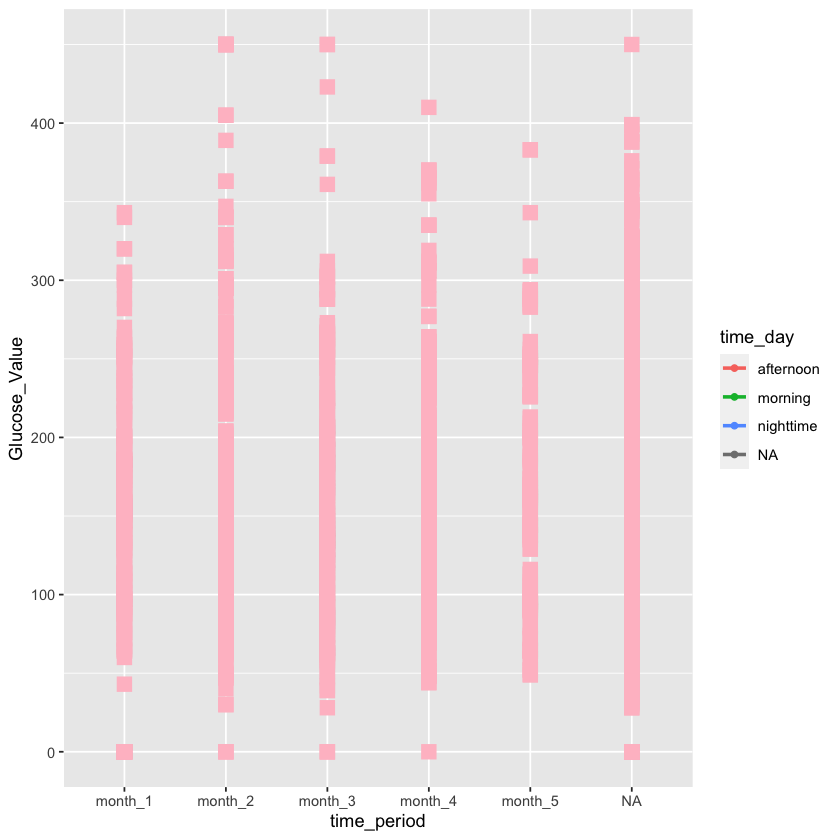

In [207]:
#Graph plot of Random Forest predictions
ggplot(Diabetes_InsGlucose_buckets4, aes(time_period, Glucose_Value, colour = time_day)) + geom_point() + geom_smooth(method = "rf", se = FALSE) +

#add prediction points
geom_point(data = rf_mdl_pred, size = 4, shape = 15, colour = "pink")

In [183]:
#Fit Random Forest model with longer tune length - to explore more models. Increased "mtry" aka number of randomly selected variables used at 
#each split. Forests with higher tune length values less likely random

rf_model2 <- train(
    Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + Unspec_Gluc + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc,
    tuneLength = 3,
    data = Diabetes_InsGlucose_buckets4,
    method = "rf",
    trControl = trainControl(
        method = "cv",
        number = 5,
        verboseIter = TRUE)
)

rf_model2

+ Fold1: mtry=2 
- Fold1: mtry=2 
+ Fold1: mtry=4 
- Fold1: mtry=4 
+ Fold1: mtry=7 
- Fold1: mtry=7 
+ Fold2: mtry=2 
- Fold2: mtry=2 
+ Fold2: mtry=4 
- Fold2: mtry=4 
+ Fold2: mtry=7 
- Fold2: mtry=7 
+ Fold3: mtry=2 
- Fold3: mtry=2 
+ Fold3: mtry=4 
- Fold3: mtry=4 
+ Fold3: mtry=7 
- Fold3: mtry=7 
+ Fold4: mtry=2 
- Fold4: mtry=2 
+ Fold4: mtry=4 
- Fold4: mtry=4 
+ Fold4: mtry=7 
- Fold4: mtry=7 
+ Fold5: mtry=2 
- Fold5: mtry=2 
+ Fold5: mtry=4 
- Fold5: mtry=4 
+ Fold5: mtry=7 
- Fold5: mtry=7 
Aggregating results
Selecting tuning parameters
Fitting mtry = 7 on full training set


Random Forest 

3634 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2907, 2907, 2906, 2908, 2908 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     64.80483  0.2671443  51.80602
  4     60.44745  0.3325440  47.72512
  7     59.72499  0.3448328  46.46155

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 7.

Nil changes with **increased** RF model tune length 

In [184]:
#Fit another Random Forest model with custom tuning.

#Define the tuning grid: tuneGrid
tuneGrid <- data.frame(
    .mtry = 100)
    .splitrule = "variance"
    .min.node.size = 5

#Fit random forest: model
rf_model3 <- train(
    Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + Unspec_Gluc + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc,
    tuneGrid = tuneGrid,
    data = Diabetes_InsGlucose_buckets4,
    method = "rf",
    trControl = trainControl(
        method = "cv",
        number = 5,
        verboseIter = TRUE
    )
)

rf_model3

+ Fold1: mtry=100 
- Fold1: mtry=100 
+ Fold2: mtry=100 
- Fold2: mtry=100 
+ Fold3: mtry=100 
- Fold3: mtry=100 
+ Fold4: mtry=100 
- Fold4: mtry=100 
+ Fold5: mtry=100 
- Fold5: mtry=100 
Aggregating results
Fitting final model on full training set


Random Forest 

3634 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2908, 2907, 2907, 2907, 2907 
Resampling results:

  RMSE      Rsquared   MAE     
  59.81445  0.3430518  46.53168

Tuning parameter 'mtry' was held constant at a value of 100

In [185]:
#GLMNET MODELING

In [186]:
glm_model <- train(
    Glucose_Value ~ Insulin_dose + Reg_Insulin + Inter_Insulin + Unspec_Gluc + PreBreak_Gluc + PreLun_Gluc + PreSup_Gluc,
    tuneLength = 3,
    data = Diabetes_InsGlucose_buckets4,
    method = "glmnet",
    trControl = trainControl(
        method = "cv",
        number = 5,
        verboseIter = TRUE
    )
)

glm_model

+ Fold1: alpha=0.10, lambda=2.35 
- Fold1: alpha=0.10, lambda=2.35 
+ Fold1: alpha=0.55, lambda=2.35 
- Fold1: alpha=0.55, lambda=2.35 
+ Fold1: alpha=1.00, lambda=2.35 
- Fold1: alpha=1.00, lambda=2.35 
+ Fold2: alpha=0.10, lambda=2.35 
- Fold2: alpha=0.10, lambda=2.35 
+ Fold2: alpha=0.55, lambda=2.35 
- Fold2: alpha=0.55, lambda=2.35 
+ Fold2: alpha=1.00, lambda=2.35 
- Fold2: alpha=1.00, lambda=2.35 
+ Fold3: alpha=0.10, lambda=2.35 
- Fold3: alpha=0.10, lambda=2.35 
+ Fold3: alpha=0.55, lambda=2.35 
- Fold3: alpha=0.55, lambda=2.35 
+ Fold3: alpha=1.00, lambda=2.35 
- Fold3: alpha=1.00, lambda=2.35 
+ Fold4: alpha=0.10, lambda=2.35 
- Fold4: alpha=0.10, lambda=2.35 
+ Fold4: alpha=0.55, lambda=2.35 
- Fold4: alpha=0.55, lambda=2.35 
+ Fold4: alpha=1.00, lambda=2.35 
- Fold4: alpha=1.00, lambda=2.35 
+ Fold5: alpha=0.10, lambda=2.35 
- Fold5: alpha=0.10, lambda=2.35 
+ Fold5: alpha=0.55, lambda=2.35 
- Fold5: alpha=0.55, lambda=2.35 
+ Fold5: alpha=1.00, lambda=2.35 
- Fold5: alpha

glmnet 

3634 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2908, 2906, 2907, 2908, 2907 
Resampling results across tuning parameters:

  alpha  lambda     RMSE      Rsquared   MAE     
  0.10   0.0235028  66.54072  0.1856569  52.29832
  0.10   0.2350280  66.56585  0.1854068  52.39262
  0.10   2.3502801  67.60278  0.1729499  53.92177
  0.55   0.0235028  66.54067  0.1856530  52.29521
  0.55   0.2350280  66.56976  0.1853807  52.39043
  0.55   2.3502801  68.37417  0.1597133  54.48738
  1.00   0.0235028  66.54065  0.1856516  52.29261
  1.00   0.2350280  66.57572  0.1853180  52.39807
  1.00   2.3502801  69.95980  0.1156840  55.41538

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were alpha = 1 and lambda = 0.0235028.

In [209]:
#Predict using trained GLM NET model and full dataset

#Predict using trained GLMN ET model on full dataset

glm_mdl_pred <- Diabetes_InsGlucose_buckets4 %>%
    mutate(glm_predictions <- predict(glm_model2, Diabetes_InsGlucose_buckets4))

head(glm_mdl_pred)

Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,...,PreLun_Gluc,PreSup_Gluc,Hypoglycaemia,hod,time_day,morn,aft_noon,evening,night,"glm_predictions <- predict(glm_model2, Diabetes_InsGlucose_buckets4)"
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,175.3802
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,9,morning,1,0,0,0,164.6503
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1,1,0,...,0,1,0,17,afternoon,0,1,0,0,160.3755
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,0,0,0,7,morning,1,0,0,0,176.2305
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,0,0,0,7,morning,1,0,0,0,164.6503
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211,month_1,1,0,...,0,1,0,16,afternoon,0,1,0,0,160.3755


`geom_smooth()` using formula 'y ~ x'


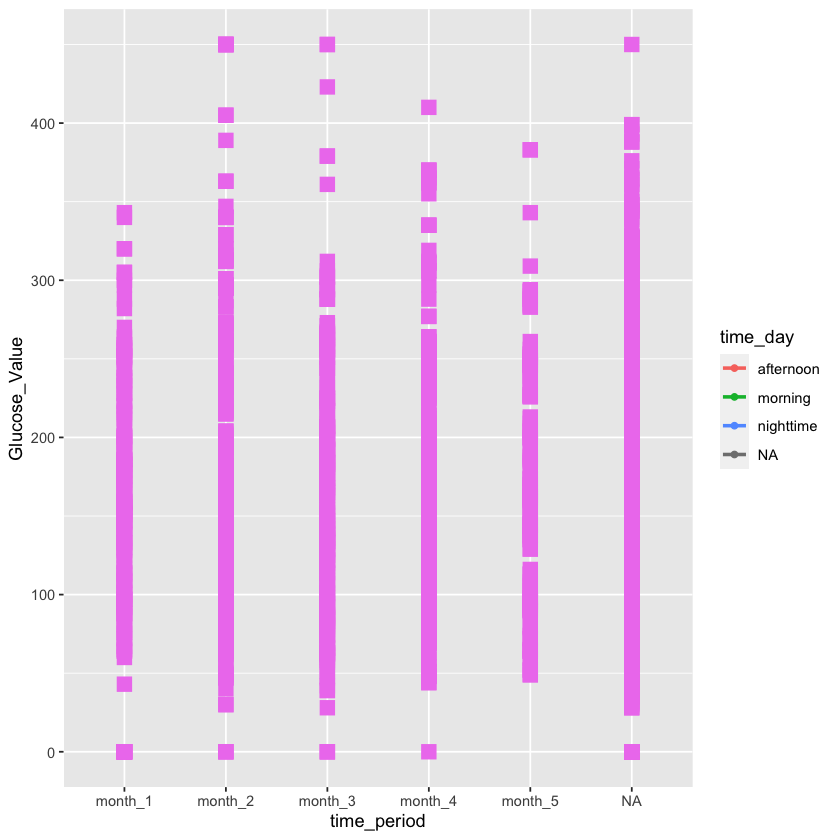

In [212]:
#Graph plot of GLM NET predictions
ggplot(Diabetes_InsGlucose_buckets4, aes(time_period, Glucose_Value, colour = time_day)) + geom_point() + geom_smooth(method = "glmnet", se = FALSE) +

#add prediction points
geom_point(data = glm_mdl_pred, size = 4, shape = 15, colour = "violet")